In [73]:
# Initialize Otter
import otter
grader = otter.Notebook("HW_1_numpy_and_plotting.ipynb")

# HW 1: Statistical analysis of data using numpy and matplotlib

Slides: (https://docs.google.com/presentation/d/1ef0msC9XIT37_Yg94Cf4TL9VBgbIIfkKik8jgshskjE/edit?usp=sharing)

Please do lab 1 before starting the first part of this homework, lab 2 before the second part, and lab 3 before tackling the last problem (the plotting part).

In this homework the focus is on code *design*. Most of the functionality of the code will be what you did in the labs. I don't expect you to do the code design; I've provided that. Just pay attention to how a couple of code structuring tools (functions, dictionaries) can make your code a little more re-usable, cleaner, and less prone to error. 

Learning to *read* code is also as important as *writing* code. This is (hopefully) a gentle introduction to using/interacting with more advanced concepts/syntax/semantics. 

By the end of the homework assignment, you will have written a method for categorizing the type of a given motion (snap, high five, or clap) and determined its accuracy on the provided dataset.

## Week 1, problem 0: Setting up libraries

TODO: Import the libraries that you will need (numpy, json, matplotlib, os)

In [74]:
# TODO: put the numpy, os, json, and matplotlib imports here so you can use those libraries (see the tops of Labs 1-3)
#  Parts 1 and 2 only need numpy, os and json. Part 3 needs matplotlib; you can either look at lab 3 and copy the import now or do
#  it later
import numpy as np
import json as json
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
grader.check("libraries")

libraries results: All test cases passed!

## Week 1, problem 1: Read data set and description

In Lab 1, you read in a few CSV files, where each contained the data from a single motion from a single person. In this problem, you will read in a single CSV file that contains a full dataset containing multiple types of motions from multiple people ("subjects") done multiple times.

The data is stored in `Data/full_dataset.csv`, and is described in `Data/full_dataset_data_description.json`. Note how `full_dataset_data_description.json` is different from `data_description.json`; there are three new data channels:

* Subject number: Identifies the person ("human subject") performing the motion. There are 10 different people in the data set.
* Run number: Each person did each motion 10 times, and this number identifies each unique run of the motion.
* Motion type: Contains the motion ID of the motion performed, corresponding to a high five, snap, or clap.

Almost all of this homework involves copying the code you wrote in Lab 1 but reading these two different files.

In [76]:
# TODO: Read in `Data/full_dataset.csv` into `full_dataset`, and `Data/full_dataset_data_description.json` into `data_description`.

full_dataset = np.loadtxt('Data/full_dataset.csv', dtype='float', delimiter=',')

with open("Data/full_dataset_data_description.json", "r") as fp:
    data_description = json.load(fp)

In [77]:
grader.check("read_data")

read_data results: All test cases passed!

## Week 1, problem 2: Filtering data set

In this homework, you will need to perform operations on individual motions identified by a specific subject, motion type, and run number. For this part, write code to extract the fourth snap performed by subject three. We will later turn this into a function.

In [78]:
# Numeric ids to indicate hand motion type from Lab 1
clap_id = 1
high_five_id = 2
snap_id = 3

# Hardcoded column numbers for this data to make the code easier; normally, you would extract this from
# full_dataset_data_description.json.
timestamp_col = 0
subject_number_col = 13
run_number_col = 14
motion_id_col = 15

In [79]:
# TODO: Extract a numpy array containing the rows for the fourth snap performed by subject three.
# Hint: You can apply three different boolean filters to whittle down the data set, 
#  use np.all() to combine the filters into one filter, or use logical and.

# Filter data using given columns and desired values
motion_filter = full_dataset[:, motion_id_col] == snap_id
column_filter = full_dataset[:, subject_number_col] == 3
run_filter = full_dataset[:, run_number_col] == 4

# Combine filters using np.all function
full_filter = np.all([motion_filter, column_filter, run_filter], axis=0)

# Apply filter to dataset
s3s4_snap_data = full_dataset[full_filter]

In [80]:
grader.check("filter_data_set")

filter_data_set results: All test cases passed!

## Week 2, problem 1: Calculate RMS

In this homework, you will be writing code to determine which motion a person is performing. One common way to differentiate between different motion types is with well chosen summary statistics of the data. This can include statistics on individual axes, as well as statistics that combine multi-dimensional data (e.g., the x, y, and z data from accelerometers).

We will use the root mean square (RMS) of the accelerometer data as one such summary statistic. RMS is particularly useful to us here since it is an excellent information stream for detecting contact (such as impact between hands, collisions between fingers as you snap), even if hand orientation is not perfectly consistent.

For this problem, you will write a function to calculate the RMS of each row in an array, and use it to calculate the RMS of two specific data channels for the entire data set.

In [81]:
# TODO: Copy get_descriptor and get_channel_data from lab 2.
def get_descriptor(data_description, name):
    """ Returns the descriptor for the given data channel.
    @param name - The name of the data channel to look for. """

# check if item in data description is desired
    for item in data_description["data_channels"]:
        if item["name"] == name:
            descriptor_dict = item
            break

    return descriptor_dict

    pass

def get_channel_data(all_data, index_offset, n_dims):
    """ Get the data for just one channel (e.g., right hand accelerometer)
    @param all_data - numpy array containing data from one or more files
    @param index_offset - the column to begin getting data from
    @param n_dims - number of dimensions for the data channel
    @return Return array should be number of rows in all_data X n_dims"""

    # create array with shape of data and desired dimensions
    channel_data = np.zeros((all_data.shape[0], n_dims))
    # insert desired data into array
    channel_data = all_data[:, index_offset:index_offset + n_dims]

    return channel_data

    pass


In [82]:
# RMS: sqrt(sum_x x^2)
def rms(array):
   """ Calculate the root mean square of each row in array.
   @param array - A 2-dimensional numpy array
   @return A 1-dimensional numpy array containing the RMS of each row in the array.
   """
   # TODO: Write this function.
   # Hint: Use numpy functions to operate on the entire array at once rather than
   # iterate through each row.

   RMS = np.sqrt(np.mean(array**2, axis=1))

   return RMS

   pass

In [83]:
# Check that the rms function works as expected
test_array = np.array([[1,2,3], [4,5,6]])
test_array_rms = rms(test_array)
assert(np.isclose(test_array_rms[0], 2.1602469))
assert(np.isclose(test_array_rms[1], 5.06622805))

In [84]:
# TODO: Use rms, full_dataset, get_descriptor, and get_channel_data to calculate the RMS of left hand accelerometer and right hand accelerometer for the entire data set.

lh_accelerometer_descriptor = get_descriptor(data_description, 'Left hand accelerometer')
lh_accelerometer_rms_check = rms(get_channel_data(full_dataset, lh_accelerometer_descriptor['index_offset'], lh_accelerometer_descriptor['dimensions']))

rh_accelerometer_descriptor = get_descriptor(data_description, 'Right hand accelerometer')
rh_accelerometer_rms_check = rms(get_channel_data(full_dataset, rh_accelerometer_descriptor['index_offset'], rh_accelerometer_descriptor['dimensions']))

In [85]:
grader.check("calculate_rms")

calculate_rms results: All test cases passed!

## Week 2, problem 2: Function for filtering data set

Take the code from Week 1 problem 2 and turn it into a re-usable function.

In [86]:
def filter_data_set(data, subject_number, run_number, motion_id):
    """ Filters a data set to a specific run of a specific motion type from a specific subject.
    @param data - The full dataset, containing multiple motion runs from multiple people.
    @return Just the rows for the given subject number, run number, and motion id.
    """

    subject_filter = full_dataset[:, subject_number_col] == subject_number
    run_filter = full_dataset[:, run_number_col] == run_number
    motion_id_filter = full_dataset[:, motion_id_col] == motion_id
    

    # Combine filters using np.all function
    full_filter = np.all([subject_filter, motion_id_filter, run_filter], axis = 0)

    # Apply filter to dataset
    filtered_data = full_dataset[full_filter]

    return filtered_data
    pass

In [87]:
grader.check("filter_function")

filter_function results: All test cases passed!

## Week 2, problem 3: Finding peak and valley of a data channel

Often, the maximum and minimum value of a data channel are informative as further summary statistics, in addition to being helpful for pinpointing the occurrence of key events such as moments of hand contact in the recorded data. The difference between these maximum and minimum values can be helpful, too, as you try to understand the range of your data. 

For this problem, you will write a function that locates the first row containing a specific value, and then use it to find the peak and valley of a data channel. The function will be very similar to the optional section of lab 2.

While data can have multiple peaks and valleys, for simplicity we will only look at the first location with the maximum and minimum value for the data channel.

In [88]:
def find_row_with_value(data, value):
    """ Locates the first index of data containing value.
    @param data - A 1-d array containing data.
    @param value - A specific value to look for in data.
    @return The index of value within data, or -1 if value is not found.
    """
    # TODO: Write this function. See the optional section of lab 2 for hints on how to do this.
    all_rows_with_min = []

    all_indices_from_where = np.where(np.isclose(data, value))

    for r in all_indices_from_where[0]:
        all_rows_with_min.append(r)

    return all_rows_with_min[0]

    pass


In [89]:
# Simple test code for your function to help debug issues.
find_row_with_value_test_array = np.array([6, 7, 8, 7, 5])

assert(find_row_with_value(find_row_with_value_test_array, 6) == 0)
assert(find_row_with_value(find_row_with_value_test_array, 7) == 1)
assert(find_row_with_value(find_row_with_value_test_array, 5) == 4)

In [90]:
# Find peak and valley of z axis of the right hand accelerometer in s3s4_snap_data
# Hint: You can use get_channel_data to extract just the rh accelerometer channel from s3s4_snap_data.

rh_accelerometer_descriptor = get_descriptor(data_description, 'Right hand accelerometer')
s3s4_snap_rh_accelerometer_data = get_channel_data(s3s4_snap_data, rh_accelerometer_descriptor['index_offset'], rh_accelerometer_descriptor['dimensions'])
s3s4_snap_rh_accelerometer_z_min = np.min(s3s4_snap_rh_accelerometer_data[:, 2])
s3s4_snap_rh_accelerometer_z_max = np.max(s3s4_snap_rh_accelerometer_data[:, 2])

s3s4_snap_rh_accelerometer_z_min_index = find_row_with_value(s3s4_snap_rh_accelerometer_data[:, 2], s3s4_snap_rh_accelerometer_z_min)
s3s4_snap_rh_accelerometer_z_max_index = find_row_with_value(s3s4_snap_rh_accelerometer_data[:, 2], s3s4_snap_rh_accelerometer_z_max)


In [91]:
grader.check("peak_and_valley")

peak_and_valley results: All test cases passed!

<!-- BEGIN QUESTION -->

## Week 3, problem 1: Graph RMS for each motion type

We have the full data set, a way to filter it, and the ability to calculate RMS for a given data channel. Let's combine these abilities and graph the left hand and right hand accelerometer RMS for a single clap, snap, and high five. After that, we can take a step back and observe how the graph differs between motion types.

In [92]:
# TODO: Copy plot_function from Lab 3.

def plot_function(axs, ts, data, channel_info, dimension_labels):
    """ Plot all of the dimensions for a given channel
    @param axs - the place to plot in
    @param ts - the time steps to use
    @param data - the numpy array from the csv file
    @param channel_info - a dictionary with the channel info, e.g. "name" and "units"
    @param n_total_dims - total number of columns per one time step
    @returns - nothing"""

    for r in range(channel_info['dimensions']):
        axs.plot(ts/1000, data[:, r], label=f"{dimension_labels[r]}")
        axs.legend(loc='upper right')
        axs.set_title(f'{channel_info['name']}')
        axs.set_xlabel('Timestamp (seconds)')
        axs.set_ylabel(f'{channel_info['name']} ({channel_info['units']})')

    pass

In [93]:
# TODO: Create a plot with 3 rows and 2 columns. Plots in the left column contain the RMS of the left hand accelerometer,
# and plots in the right column contain the RMS of the right hand accelerometer. The first row contains graphs for a snap,
# the second row a clap, and the third row a high five. You can plot any single snap, clap, or high five in the data set.

# Use the variables below when filtering the data.
# For the final submitted graph, please use subject 6 run 3.
# But prior to submission, feel free to explore the data
# by looking at graphs for other subjects/runs!
snap_subject_number = 6
snap_run_number = 3

clap_subject_number = 6
clap_run_number = 3

high_five_subject_number = 6
high_five_run_number = 3

# Hint: For calculating and using RMS, you have two options:
#
#   I've copied `full_dataset` into `all_data` for you
# * Add two columns to the end of `all_data` containing the RMS of the left hand accelerometer and the right hand accelerometer
#   for every row in the data set, and then filter `all_data` to the specific subject number, run number, and motion type.
#   You can use `np.append` to add these columns.
#
# OR
#
# * Filter `all_data` to the specific subject number, run number, and motion type, and then calculate the RMS of the left hand
#   accelerometer and right hand accelerometer for that motion in separate numpy arrays.

all_data = np.copy(full_dataset)

# create and append rms
lh_accelerometer_descriptor = get_descriptor(data_description, 'Left hand accelerometer')
lh_accelerometer_rms_check = rms(get_channel_data(all_data, lh_accelerometer_descriptor['index_offset'], lh_accelerometer_descriptor['dimensions']))

all_data = np.append(all_data, lh_accelerometer_rms_check[:, np.newaxis], axis=1)

rh_accelerometer_descriptor = get_descriptor(data_description, 'Right hand accelerometer')
rh_accelerometer_rms_check = rms(get_channel_data(all_data, rh_accelerometer_descriptor['index_offset'], rh_accelerometer_descriptor['dimensions']))

all_data = np.append(all_data, rh_accelerometer_rms_check[:, np.newaxis], axis=1)

# filter subject and run
run_filter = all_data[:, run_number_col] == snap_run_number
subject_filter = all_data[:, subject_number_col] == snap_subject_number
# combine filters
subject_run_filter = np.all([run_filter, subject_filter], axis=0)
# apply filters to all_data
all_data_filtered = all_data[subject_run_filter]

# filter snap, clap, high five
snap_filter = all_data_filtered[:, motion_id_col] == snap_id
clap_filter = all_data_filtered[:, motion_id_col] == clap_id
high_five_filter = all_data_filtered[:, motion_id_col] == high_five_id

# apply filters, select only rms columns
snap_rms = all_data_filtered[snap_filter][:, -2:]
clap_rms = all_data_filtered[clap_filter][:, -2:]
high_five_rms = all_data_filtered[high_five_filter][:, -2:]

C:\Users\Cody\AppData\Local\Temp\ipykernel_2448\3579898052.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs.legend(loc='upper right')


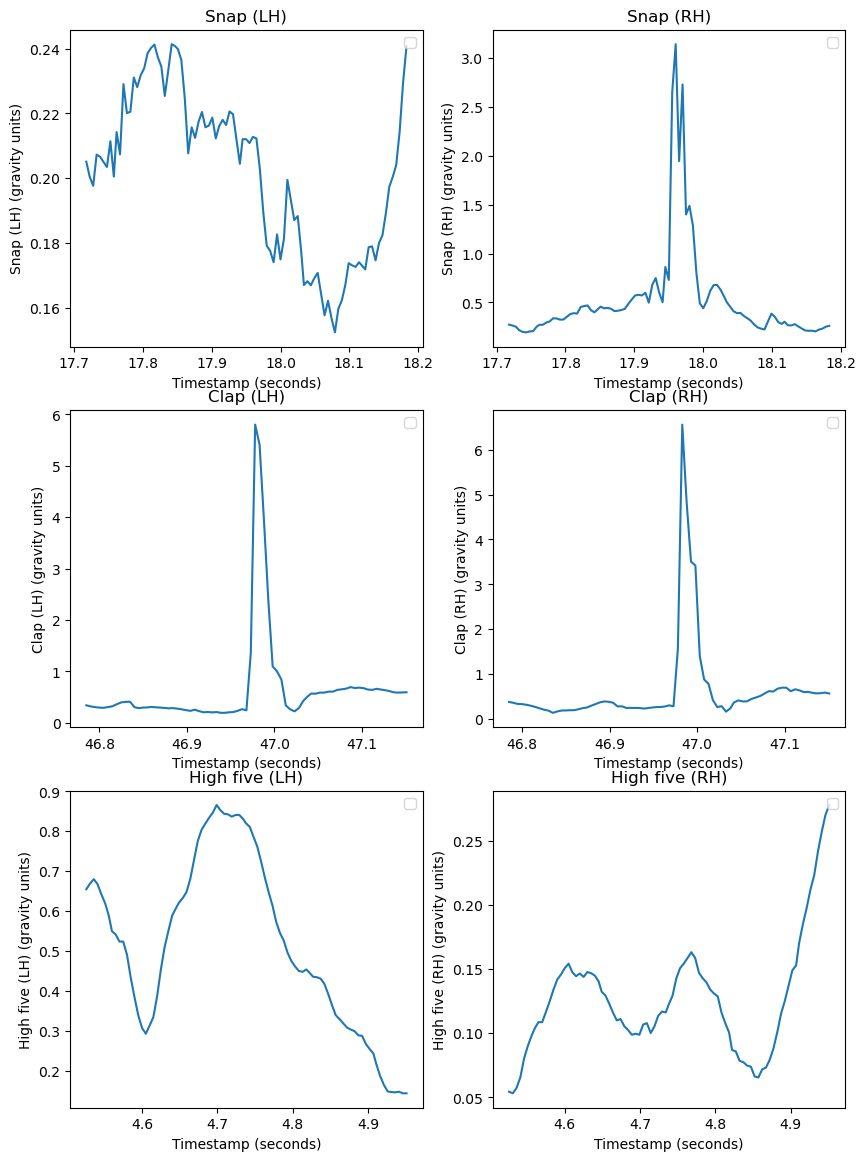

In [100]:
# Here, graph the data
nrows = 3
ncols = 2
fig, axs = plt.subplots(nrows, ncols, figsize=(10, 14))

# Put left hand in the first column, right hand in the second column.
# Hint: To use plot_function with your new "rms" data channel, you will need to make a
# dictionary for its descriptor with "name" and "units" entries.
rms_descriptor = [{'name':'Snap (LH)', 'units':'gravity units', 'dimensions':1}, 
                    {'name':'Snap (RH)', 'units':'gravity units', 'dimensions':1},
                    {'name':'Clap (LH)', 'units':'gravity units', 'dimensions':1},
                    {'name':'Clap (RH)', 'units':'gravity units', 'dimensions':1},
                    {'name':'High five (LH)', 'units':'gravity units', 'dimensions':1},
                    {'name':'High five (RH)', 'units':'gravity units', 'dimensions':1}
                    ]

# snap
plot_function(axs = axs[0, 0], ts = all_data_filtered[snap_filter][:, timestamp_col], data = snap_rms, channel_info = rms_descriptor[0], dimension_labels = [''])
plot_function(axs = axs[0, 1], ts = all_data_filtered[snap_filter][:, timestamp_col], data = snap_rms[:, 1:], channel_info = rms_descriptor[1], dimension_labels = [''])

# clap
plot_function(axs = axs[1, 0], ts = all_data_filtered[clap_filter][:, timestamp_col], data = clap_rms, channel_info = rms_descriptor[2], dimension_labels = [''])
plot_function(axs = axs[1, 1], ts = all_data_filtered[clap_filter][:, timestamp_col], data = clap_rms[:, 1:], channel_info = rms_descriptor[3], dimension_labels = [''])

# high five
plot_function(axs = axs[2, 0], ts = all_data_filtered[high_five_filter][:, timestamp_col], data = high_five_rms, channel_info = rms_descriptor[4], dimension_labels = [''])
plot_function(axs = axs[2, 1], ts = all_data_filtered[high_five_filter][:, timestamp_col], data = high_five_rms[:, 1:], channel_info = rms_descriptor[5], dimension_labels = [''])

plt.show()
fig.tight_layout()

In [95]:
# Manual grade
print("This is a manually-graded question; there is no grader.check() function. See rubric and slides for more information on expected output.")
#                                 __     
#                                |  \    
#  _______    ______    ______  _| $$_   
# |       \  /      \  |      \|   $$ \  
# | $$$$$$$\|  $$$$$$\  \$$$$$$\\$$$$$$  
# | $$  | $$| $$    $$ /      $$ | $$ __ 
# | $$  | $$| $$$$$$$$|  $$$$$$$ | $$|  \
# | $$  | $$ \$$     \ \$$    $$  \$$  $$
#  \$$   \$$  \$$$$$$$  \$$$$$$$   \$$$$ 


This is a manually-graded question; there is no grader.check() function. See rubric and slides for more information on expected output.


<!-- END QUESTION -->

## Week 3, problem 2: Determine motion type from data

Observe your graphs from the previous problem. How can you tell, from these graphs alone, what motion type the subject is performing?

Some helpful context:

* Subjects were told to snap with their _right hand_ and high five with their _left hand_.
* The high five was pantomimed; that is, the subject did not make contact with another hand, but instead made a high five motion.

From your observations, write a function that takes in the left hand and right hand accelerometer RMS values and returns the most likely motion type that the subject is performing.

Hint: Look at the peaks in the graphs, the magnitude of the peaks, and the hand(s) that the peaks occur on.

Hint: You could return to the previous problem and graph different subjects/runs for inspiration.

In [168]:
def guess_motion_type(lh_accelerometer_rms, rh_accelerometer_rms):
    """ Guesses the motion that the subject is performing given the RMS of the user's left hand and right hand accelerometers.
    @param lh_accelerometer_rms - RMS of the left hand accelerometer
    @param rh_accelerometer_rms - RMS of the right hand accelerometer
    @return The motion ID of the motion the user was most likely performing.
    """
    
    if np.max(rh_accelerometer_rms) >= 5:
        motion_id = clap_id
    elif np.max(lh_accelerometer_rms) >= 0.7 and np.max(lh_accelerometer_rms) < 1:
        motion_id = high_five_id
    elif np.max(rh_accelerometer_rms) >= 2.2 and np.max(rh_accelerometer_rms) < 5:
        motion_id = snap_id
    else:
        motion_id = 4

    print(np.max(lh_accelerometer_rms))
    print(np.max(rh_accelerometer_rms))
    print('------')

    return motion_id
    pass

In [169]:
# Test code
s3s4_snap_lh_accelerometer_data = get_channel_data(s3s4_snap_data, index_offset=lh_accelerometer_descriptor["index_offset"], n_dims=lh_accelerometer_descriptor["dimensions"])

assert(snap_id == guess_motion_type(rms(s3s4_snap_lh_accelerometer_data), rms(s3s4_snap_rh_accelerometer_data)))

0.2878078062411326
4.385954856128822
------


In [161]:
grader.check("determine_motion_type")

determine_motion_type results: All test cases passed!

## Week 3, problem 3: Calculate accuracy of your heuristic

You now have a function that guesses the motion type for a given motion, and we have ground truth labels for what motions the subjects are performing. Let's calculate the accuracy of your heuristic.

The data set contains 10 subjects (1 through 10) that perform 10 runs (1 through 10) of each motion type (snap, high five, and clap). You can write nested loops to iterate through each of these and guess the motion type.

We expect to see accuracies above 75%, and accuracies above 90% are possible.

In [170]:
# TODO: Produce a numpy array that contains a row with 4 columns containing subject number, run number, actual motion, and guessed motion
accuracy_info = np.zeros((300, 4))
accuracy_info[:, 0] = np.repeat(np.arange(1,11), 30)
accuracy_info[:, 1] = np.tile(np.arange(1, 11), 30)
accuracy_info[:, 2] = np.tile(np.repeat(np.arange(1, 4), 10), 10)

failed = 0

for r in range(accuracy_info.shape[0]):
    subject = accuracy_info[r, 0]
    run = accuracy_info[r, 1]
    actual_motion = accuracy_info[r, 2]

    sub_acc_filt = all_data[:, subject_number_col] == subject
    run_acc_filt = all_data[:, run_number_col] == run
    mot_acc_filt = all_data[:, motion_id_col] == actual_motion

    acc_filter = np.all([sub_acc_filt, run_acc_filt, mot_acc_filt], axis=0)

    rms_data = all_data[acc_filter][:, -2:]

    guessed_motion = guess_motion_type(lh_accelerometer_rms = rms_data[0], rh_accelerometer_rms = rms_data[1])

    accuracy_info[r, 3] = guessed_motion

# TODO: Count the number of correct and incorrect guesses.
# Hint: np.where is useful here.
correct_count_list = np.where(accuracy_info[:, 2] == accuracy_info[:, 3])
incorrect_count_list = np.where(accuracy_info[:, 2] != accuracy_info[:, 3])
correct_count = len(correct_count_list[0])
incorrect_count = len(incorrect_count_list[0])

print(incorrect_count_list)

# TODO: Use correct_count and incorrect_count to calculate accuracy
# Hint: You will need to do conversions to floats to avoid doing integer division.
accuracy = correct_count/(correct_count + incorrect_count)

print(f'guess_motion_type is {accuracy * 100}% accurate')

0.9700343636524773
0.9628257024681742
------
0.901036440254592
0.8672754272240547
------
0.8826852968829453
0.8882004278314665
------
0.9692092997215135
0.9258869621431476
------
0.9192388155425117
0.9288164511893617
------
0.978246730976734
0.9827173211729471
------
0.9512973597496561
0.9613185389522733
------
0.9843610448746266
0.9634832639957999
------
0.9101098834756164
0.9273977931107377
------
0.8846845012017939
0.891010662113535
------
0.8681205753426959
0.8496666012815458
------
0.8120344820264717
0.8136543082497218
------
0.7968479570574719
0.8036583021823807
------
0.7932633022311487
0.8150460109711598
------
0.8705553782882894
0.8670640114778148
------
0.8277076778670113
0.8379538571226143
------
0.7521081482517434
0.7487322618933953
------
0.8005206639015218
0.8094854332640375
------
0.8586229284926729
0.8619938128161555
------
0.7889655674784969
0.8010201828501784
------
0.45229046714104715
0.4658325879540847
------
0.3616167400254953
0.3734523619776245
------
0.3468909530

In [ ]:
grader.check("calculate_accuracy")

## Week 3, problem 4: Find the "worst" subject

Which subject does your heuristic perform the worst on?

In [163]:
# TODO: Populate a numpy array with one entry per subject, counting the number of 
# incorrect motion type predictions.
incorrect_by_subject = np.zeros((3, 1))

incorrect_array = accuracy_info[incorrect_count_list]
clap_wrong = np.sum(incorrect_array[:, 2] == 1)
high_five_wrong = np.sum(incorrect_array[:, 2] == 2)
snap_wrong = np.sum(incorrect_array[:, 2] == 3)

print(clap_wrong)
print(high_five_wrong)
print(snap_wrong)

# incorrect_by_subject[0] =

# TODO: Use incorrect_by_subject to determine the subject number that guess_motion_type
# performed worst on.
# Hint: find_row_with_value might be useful here.
worst_subject_number = ...

print(f'guess_motion_type performed worst on subject {worst_subject_number}')

100
67
100
guess_motion_type performed worst on subject Ellipsis


In [ ]:
grader.check("worst_subject")

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [ ]:

# List of names (creates a set)
worked_with_names = {"not filled out"}
# List of URLS I25 (creates a set)
websites = {"not filled out"}
# Approximate number of hours, including lab/in-class time
hours = -1.5

In [ ]:
grader.check("hours_collaborators")

### To submit

- Do a restart then run all to make sure everything runs ok
- Remove excessive print statements - don't make us search through pages of numbers to find your plots
- Save the file
- Submit just this .ipynb file through gradescope, HWK1 numpy and Plotting
- You do NOT need to submit the data files - we will supply those

If the Gradescope autograder fails, please check here first for common reasons for it to fail
    https://docs.google.com/presentation/d/1tYa5oycUiG4YhXUq5vHvPOpWJ4k_xUPp2rUNIL7Q9RI/edit?usp=sharing

Most likely failure for this assignment is not naming the data directory and files correctly; capitalization matters for the Gradescope grader. 